In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from custom_funcs.convertToMilitary import convertToMilitary 

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [3]:
import nltk

In [4]:
from nltk.stem import WordNetLemmatizer

In [5]:
lemmatizer = WordNetLemmatizer()

In [6]:
df = pd.read_csv('chicago_crimeV1.csv')

In [7]:
df_copy1 = df.copy()

In [18]:
df_arrest_year = df.pivot(index='year', columns='Arrest')
df_arrest_year

KeyError: "None of ['year'] are in the columns"

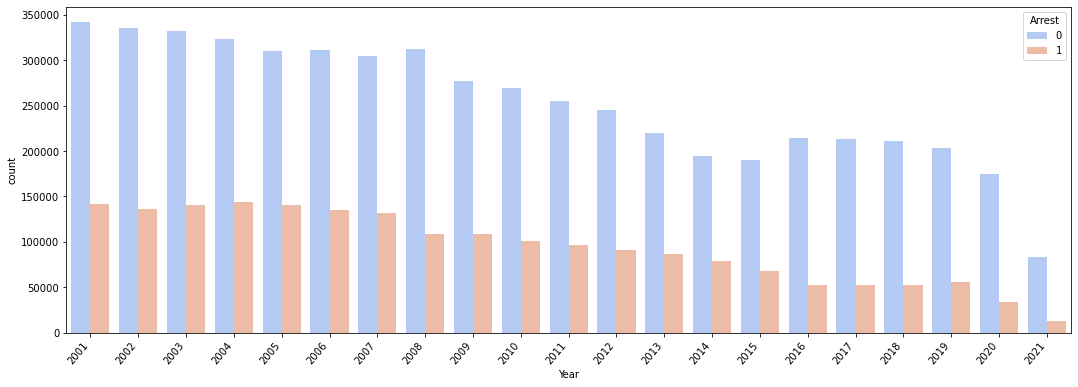

In [15]:
#Barplot of arrests by primary type
plt.figure(figsize = (18,6))
ax = sns.countplot(x='Year', hue='Arrest',data=df, palette='coolwarm');
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
# plt.tight_layout()
plt.show()

In [8]:
#Not the best bc these columns are not ordinal and shouldn't have a weight value to them 
#However, will tell some information in a heatmap and correlation matrix
le= preprocessing.LabelEncoder()
df['Primary Type'] = le.fit_transform(df['Primary Type'])
df['Location Description'] = le.fit_transform(df['Location Description'])
df['Domestic'] = le.fit_transform(df['Domestic'])
df['District'] = le.fit_transform(df['District'])
df['Description'] = le.fit_transform(df['Description'])
df['MilitaryTime'] = le.fit_transform(df['MilitaryTime'])
df['Street Name'] = le.fit_transform(df['Street Name'])
df['Arrest']= le.fit_transform(df['Arrest'])


In [9]:
df.head()

,ID,Case Number,Date,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,FBI Code,Year,Updated On,Latitude,Longitude,DateOnly,Time,Street Name,MilitaryTime
0,10224738,HY411648,09/05/2015 01:30:00 PM,0486,2,206,158,0,1,924,8,08B,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,09/05/2015,01:30:00 PM,2122,809
1,10224739,HY411615,09/04/2015 11:30:00 AM,0870,34,361,68,0,0,1511,13,06,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,09/04/2015,11:30:00 AM,592,689
2,10224740,HY411595,09/05/2015 12:45:00 PM,2023,19,377,181,1,0,1412,12,18,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,09/05/2015,12:45:00 PM,440,44
3,10224741,HY411610,09/05/2015 01:00:00 PM,0560,1,442,17,0,1,1522,13,08A,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,09/05/2015,01:00:00 PM,1321,779
4,10224742,HY411435,09/05/2015 10:55:00 AM,0610,3,233,158,0,0,614,5,05,2015,02/10/2018 03:50:01 PM,41.744379,-87.658431,09/05/2015,10:55:00 AM,1379,654


<AxesSubplot:>

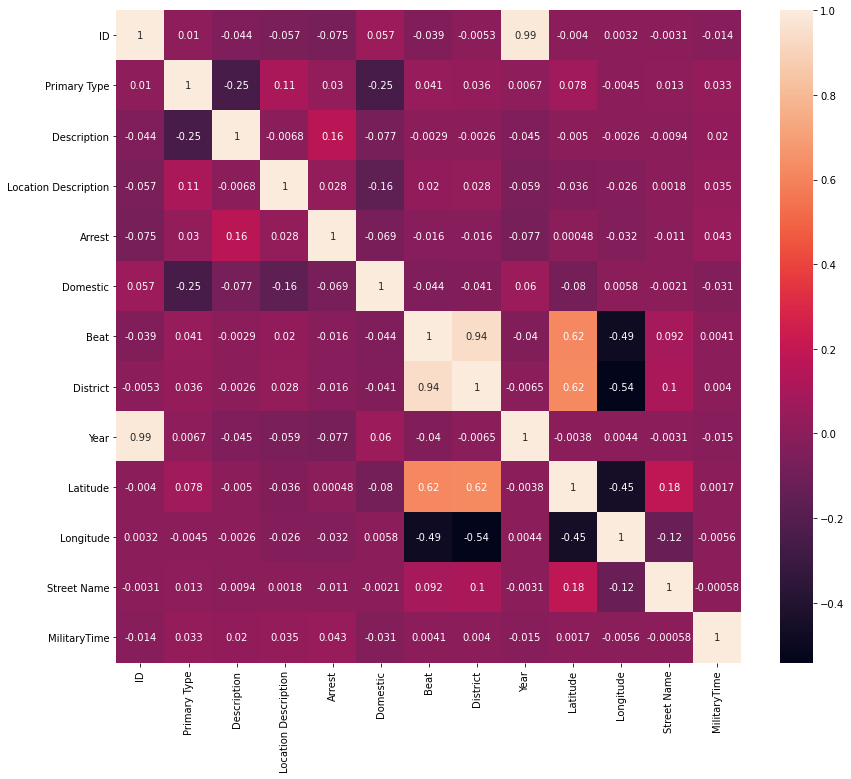

In [10]:
#Heatmap to see visualize the correlations btw selected feature and price of the home
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(), annot=True)
#Highest correlation between description (.16), Year (-.077), 
#Domestic (-.069) Military Time(.043), and Primary Type (.03)


In [11]:
df.corr()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Year,Latitude,Longitude,Street Name,MilitaryTime
ID,1.000000,0.010328,-0.043633,-0.057002,-0.075001,0.057113,-0.038751,-0.005284,0.987300,-0.003964,0.003186,-0.003109,-0.014108
Primary Type,0.010328,1.000000,-0.249506,0.106835,0.029681,-0.247760,0.041442,0.036450,0.006716,0.077869,-0.004530,0.012528,0.033184
Description,-0.043633,-0.249506,1.000000,-0.006847,0.163669,-0.077154,-0.002871,-0.002581,-0.045444,-0.005030,-0.002598,-0.009367,0.020431
Location Description,-0.057002,0.106835,-0.006847,1.000000,0.027764,-0.162312,0.019654,0.028014,-0.059333,-0.036145,-0.026288,0.001841,0.034772
Arrest,-0.075001,0.029681,0.163669,0.027764,1.000000,-0.069114,-0.016004,-0.016220,-0.077469,0.000481,-0.031567,-0.011284,0.042768
Domestic,0.057113,-0.247760,-0.077154,-0.162312,-0.069114,1.000000,-0.044437,-0.040899,0.059931,-0.080096,0.005785,-0.002096,-0.030956
Beat,-0.038751,0.041442,-0.002871,0.019654,-0.016004,-0.044437,1.000000,0.940916,-0.040471,0.620629,-0.485276,0.092431,0.004138
District,-0.005284,0.036450,-0.002581,0.028014,-0.016220,-0.040899,0.940916,1.000000,-0.006525,0.621060,-0.541315,0.103189,0.004022
Year,0.987300,0.006716,-0.045444,-0.059333,-0.077469,0.059931,-0.040471,-0.006525,1.000000,-0.003840,0.004407,-0.003110,-0.015078
Latitude,-0.003964,0.077869,-0.005030,-0.036145,0.000481,-0.080096,0.620629,0.621060,-0.003840,1.000000,-0.454397,0.183195,0.001663


In [12]:
# df['aggregate'] = df['Primary Type'] + " " +  df['Description'] + " " +  df['Location Description'] + " " +  df['Street Name']

In [13]:
df_copy1.head()

,ID,Case Number,Date,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,FBI Code,Year,Updated On,Latitude,Longitude,DateOnly,Time,Street Name,MilitaryTime
0,10224738,HY411648,09/05/2015 01:30:00 PM,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,08B,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,09/05/2015,01:30:00 PM,WOOD,1330
1,10224739,HY411615,09/04/2015 11:30:00 AM,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,06,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,09/04/2015,11:30:00 AM,CENTRAL,1130
2,10224740,HY411595,09/05/2015 12:45:00 PM,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,18,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,09/05/2015,12:45:00 PM,BARRY,45
3,10224741,HY411610,09/05/2015 01:00:00 PM,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,08A,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,09/05/2015,01:00:00 PM,LARAMIE,1300
4,10224742,HY411435,09/05/2015 10:55:00 AM,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,614,6.0,05,2015,02/10/2018 03:50:01 PM,41.744379,-87.658431,09/05/2015,10:55:00 AM,LOOMIS,1055


In [14]:
primary_type_dummies = pd.get_dummies(df['Primary Type'
])
primary_type_dummies

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7285186,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7285187,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7285188,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7285189,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
